https://github.com/vadimkantorov/caffemodel2pytorch

## Use pytorch caffe to convert the model

https://blog.csdn.net/u014525760/article/details/80648943

In [1]:
import os
from time import time
import re
import numpy as np
import torch
from cv2 import imread, imwrite
import matplotlib.pylab as plt

In [2]:
import sys
import os
sys.path.append("D:\Github\pytorch-caffe")
from caffenet import *

Check GPU usage

In [41]:
torch.cuda.current_device()
print(torch.cuda.device(0))
torch.cuda.device_count()
torch.cuda.get_device_name(0)
torch.cuda.is_available()

True

In [23]:
from importlib import reload
# reload(caffenet)

NameError: name 'caffenet' is not defined

In [4]:
basedir = r"D:\Generator_DB_Windows\nets\caffenet"

Second Time loading 

In [5]:
basedir = r"D:\Generator_DB_Windows\nets"
protofile = os.path.join(basedir, r"\caffenet\caffenet.prototxt") # 'resnet50/deploy.prototxt'
# weightfile = os.path.join(basedir, 'bvlc_reference_caffenet.caffemodel') # 'resnet50/resnet50.caffemodel'
save_path = os.path.join(basedir, r"\caffenet\caffenet_state_dict.pt")
net = CaffeNet(protofile)
net.load_state_dict(torch.load(save_path))
net.eval()

create conv1                (   3 x  227 x  227) -> (  96 x   55 x   55)
create relu1                (  96 x   55 x   55) -> (  96 x   55 x   55)
create pool1                (  96 x   55 x   55) -> (  96 x   27 x   27)
create norm1                (  96 x   27 x   27) -> (  96 x   27 x   27)
create conv2                (  96 x   27 x   27) -> ( 256 x   27 x   27)
create relu2                ( 256 x   27 x   27) -> ( 256 x   27 x   27)
create pool2                ( 256 x   27 x   27) -> ( 256 x   13 x   13)
create norm2                ( 256 x   13 x   13) -> ( 256 x   13 x   13)
create conv3                ( 256 x   13 x   13) -> ( 384 x   13 x   13)
create relu3                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create conv4                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create relu4                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create conv5                ( 384 x   13 x   13) -> ( 256 x   13 x   13)
create relu5                ( 256 x   13 x   13) ->

CaffeNet(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (relu1): ReLU(inplace=True)
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (norm1): LRN(size=5, alpha=0.000100, beta=0.750000, k=1)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=2)
  (relu2): ReLU(inplace=True)
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (norm2): LRN(size=5, alpha=0.000100, beta=0.750000, k=1)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU(inplace=True)
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
  (relu4): ReLU(inplace=True)
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
  (relu5): ReLU(inplace=True)
  (pool5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (fc6): Sequential(
    (0): view(nB, -1)
    (1): Linear(i

In [ ]:
# protofile = os.path.join(basedir, "caffenet.prototxt") # 'resnet50/deploy.prototxt'
# weightfile = os.path.join(basedir, 'bvlc_reference_caffenet.caffemodel') # 'resnet50/resnet50.caffemodel'
# net = CaffeNet(protofile)
# print(net)
# net.load_weights(weightfile)
# net.eval()
#image = load_image(imgfile)

create conv1                (   3 x  227 x  227) -> (  96 x   55 x   55)
create relu1                (  96 x   55 x   55) -> (  96 x   55 x   55)
create pool1                (  96 x   55 x   55) -> (  96 x   27 x   27)
create norm1                (  96 x   27 x   27) -> (  96 x   27 x   27)
create conv2                (  96 x   27 x   27) -> ( 256 x   27 x   27)
create relu2                ( 256 x   27 x   27) -> ( 256 x   27 x   27)
create pool2                ( 256 x   27 x   27) -> ( 256 x   13 x   13)
create norm2                ( 256 x   13 x   13) -> ( 256 x   13 x   13)
create conv3                ( 256 x   13 x   13) -> ( 384 x   13 x   13)
create relu3                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create conv4                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create relu4                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create conv5                ( 384 x   13 x   13) -> ( 256 x   13 x   13)
create relu5                ( 256 x   13 x   13) ->

In [25]:
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([96, 3, 11, 11])
conv1.bias 	 torch.Size([96])
conv2.weight 	 torch.Size([256, 48, 5, 5])
conv2.bias 	 torch.Size([256])
conv3.weight 	 torch.Size([384, 256, 3, 3])
conv3.bias 	 torch.Size([384])
conv4.weight 	 torch.Size([384, 192, 3, 3])
conv4.bias 	 torch.Size([384])
conv5.weight 	 torch.Size([256, 192, 3, 3])
conv5.bias 	 torch.Size([256])
fc6.1.weight 	 torch.Size([4096, 9216])
fc6.1.bias 	 torch.Size([4096])
fc7.1.weight 	 torch.Size([4096, 4096])
fc7.1.bias 	 torch.Size([4096])
fc8.1.weight 	 torch.Size([1000, 4096])
fc8.1.bias 	 torch.Size([1000])


In [28]:
save_path = os.path.join(basedir, "\caffenet\caffenet_state_dict.pt")
torch.save(net.state_dict(), save_path)

In [20]:
net = net.float()

In [10]:
image = 255*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
blobs = net(image)

forward conv1                          [1, 3, 224, 224] -> [1, 96, 54, 54]
forward relu1                          [1, 96, 54, 54] -> [1, 96, 54, 54]
forward pool1                          [1, 96, 54, 54] -> [1, 96, 27, 27]
forward norm1                          [1, 96, 27, 27] -> [1, 96, 27, 27]
forward conv2                          [1, 96, 27, 27] -> [1, 256, 27, 27]
forward relu2                          [1, 256, 27, 27] -> [1, 256, 27, 27]
forward pool2                          [1, 256, 27, 27] -> [1, 256, 13, 13]
forward norm2                          [1, 256, 13, 13] -> [1, 256, 13, 13]
forward conv3                          [1, 256, 13, 13] -> [1, 384, 13, 13]
forward relu3                          [1, 384, 13, 13] -> [1, 384, 13, 13]
forward conv4                          [1, 384, 13, 13] -> [1, 384, 13, 13]
forward relu4                          [1, 384, 13, 13] -> [1, 384, 13, 13]
forward conv5                          [1, 384, 13, 13] -> [1, 256, 13, 13]
forward relu5       

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


forward prob                           [1, 1000] -> [1, 1000]


In [11]:
fc8_1neur = blobs['fc8'][0,1]

In [12]:
fc8_1neur.backward()

In [8]:
import torch.optim as optim

In [21]:
print(fc8_1neur.data.item())

-0.21719138324260712


In [6]:
net.verbose = False

In [38]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.01)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc8'][0,1]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation -0.098
50 steps, Neuron activation 9.585
100 steps, Neuron activation 22.943
150 steps, Neuron activation 36.184
200 steps, Neuron activation 50.090
250 steps, Neuron activation 63.927
300 steps, Neuron activation 77.025
350 steps, Neuron activation 89.272
400 steps, Neuron activation 100.329
450 steps, Neuron activation 110.275
500 steps, Neuron activation 119.572
550 steps, Neuron activation 127.729
600 steps, Neuron activation 135.108
650 steps, Neuron activation 141.826
700 steps, Neuron activation 147.953
750 steps, Neuron activation 153.400
800 steps, Neuron activation 158.382
850 steps, Neuron activation 163.048
900 steps, Neuron activation 167.148
950 steps, Neuron activation 171.216


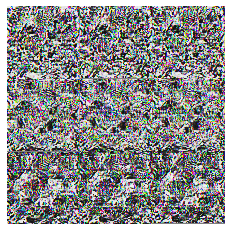

In [47]:
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

In [48]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.001)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc8'][0,5]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 0.052
50 steps, Neuron activation 1.302
100 steps, Neuron activation 3.106
150 steps, Neuron activation 5.739
200 steps, Neuron activation 9.098
250 steps, Neuron activation 11.922
300 steps, Neuron activation 14.071
350 steps, Neuron activation 15.907
400 steps, Neuron activation 17.531
450 steps, Neuron activation 18.917
500 steps, Neuron activation 20.142
550 steps, Neuron activation 21.330
600 steps, Neuron activation 22.468
650 steps, Neuron activation 23.611
700 steps, Neuron activation 24.759
750 steps, Neuron activation 25.893
800 steps, Neuron activation 27.030
850 steps, Neuron activation 28.168
900 steps, Neuron activation 29.307
950 steps, Neuron activation 30.440


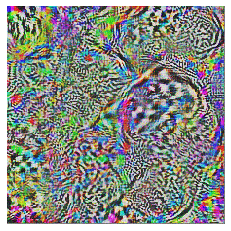

In [49]:
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

In [50]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.05)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc8'][0,5]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 0.051
50 steps, Neuron activation 29.339
100 steps, Neuron activation 58.462
150 steps, Neuron activation 81.571
200 steps, Neuron activation 97.100
250 steps, Neuron activation 108.090
300 steps, Neuron activation 116.139
350 steps, Neuron activation 121.951
400 steps, Neuron activation 126.820
450 steps, Neuron activation 130.617
500 steps, Neuron activation 132.660
550 steps, Neuron activation 135.073
600 steps, Neuron activation 136.957
650 steps, Neuron activation 138.388
700 steps, Neuron activation 139.782
750 steps, Neuron activation 140.945
800 steps, Neuron activation 141.912
850 steps, Neuron activation 142.604
900 steps, Neuron activation 143.175
950 steps, Neuron activation 143.736


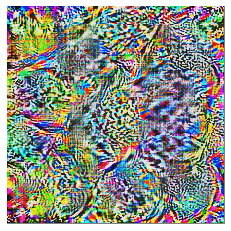

In [51]:
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation -0.159
50 steps, Neuron activation 33.505
100 steps, Neuron activation 87.839
150 steps, Neuron activation 134.476
200 steps, Neuron activation 164.976
250 steps, Neuron activation 186.506
300 steps, Neuron activation 202.202
350 steps, Neuron activation 213.755
400 steps, Neuron activation 222.393
450 steps, Neuron activation 229.193
500 steps, Neuron activation 234.806
550 steps, Neuron activation 239.726
600 steps, Neuron activation 243.525
650 steps, Neuron activation 246.408
700 steps, Neuron activation 248.873
750 steps, Neuron activation 250.763
800 steps, Neuron activation 252.429
850 steps, Neuron activation 253.956
900 steps, Neuron activation 254.989
950 steps, Neuron activation 256.316


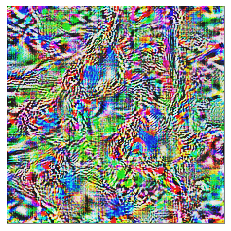

In [9]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.05)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc8'][0,10]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 0.000
50 steps, Neuron activation 0.000
100 steps, Neuron activation 0.000
150 steps, Neuron activation 0.000
200 steps, Neuron activation 0.000
250 steps, Neuron activation 0.000
300 steps, Neuron activation 0.000
350 steps, Neuron activation 0.000
400 steps, Neuron activation 0.000
450 steps, Neuron activation 0.000
500 steps, Neuron activation 0.000
550 steps, Neuron activation 0.000
600 steps, Neuron activation 0.000
650 steps, Neuron activation 0.000
700 steps, Neuron activation 0.000
750 steps, Neuron activation 0.000
800 steps, Neuron activation 0.000
850 steps, Neuron activation 0.000
900 steps, Neuron activation 0.000
950 steps, Neuron activation 0.000


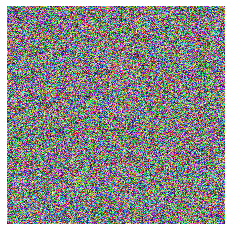

In [15]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.05)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc7'][0,3]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

In [22]:
def load_image(imgfile):
    import caffe
    image = caffe.io.load_image(imgfile)
    transformer = caffe.io.Transformer({'data': (1, 3, args.height, args.width)})
    transformer.set_transpose('data', (2, 0, 1))
    transformer.set_mean('data', np.array([args.meanB, args.meanG, args.meanR]))
    transformer.set_raw_scale('data', args.scale)
    transformer.set_channel_swap('data', (2, 1, 0))
 
    image = transformer.preprocess('data', image)
    image = image.reshape(1, 3, args.height, args.width)
    return image
 
def forward_pytorch(protofile, weightfile, image):
    net = CaffeNet(protofile)
    print(net)
    net.load_weights(weightfile)
    net.eval()
    image = torch.from_numpy(image)
    image = Variable(image)
    blobs = net(image)
    return blobs, net.models

## Load DeconvNet

In [3]:
basedir = r"D:\Generator_DB_Windows\nets"
save_path = os.path.join(basedir, r"upconv/fc6/generator_state_dict.pt")

In [4]:
basedir = r"D:/Generator_DB_Windows/nets"
protofile = os.path.join(basedir, r"upconv/fc6/generator.prototxt") # 'resnet50/deploy.prototxt'
weightfile = os.path.join(basedir, r'upconv/fc6/generator.caffemodel') # 'resnet50/resnet50.caffemodel'
Generator = CaffeNet(protofile)
print(Generator)
Generator.load_weights(weightfile)
Generator.eval()
# Generator.load_state_dict(torch.load(save_path))
# Generator.eval()

create defc7                (4096 x    1 x    1) -> (4096 x    1 x    1)
create relu_defc7           (4096 x    1 x    1) -> (4096 x    1 x    1)
create defc6                (4096 x    1 x    1) -> (4096 x    1 x    1)
create relu_defc6           (4096 x    1 x    1) -> (4096 x    1 x    1)
create defc5                (4096 x    1 x    1) -> (4096 x    1 x    1)
create relu_defc5           (4096 x    1 x    1) -> (4096 x    1 x    1)
create reshape              (4096 x    1 x    1) -> ( 256 x    4 x    4)
create deconv5              ( 256 x    4 x    4) -> ( 256 x    8 x    8)
create relu_deconv5         ( 256 x    8 x    8) -> ( 256 x    8 x    8)
create conv5_1              ( 256 x    8 x    8) -> ( 512 x   16 x   16)
create relu_conv5_1         ( 512 x   16 x   16) -> ( 512 x   16 x   16)
create deconv4              ( 512 x   16 x   16) -> ( 256 x   32 x   32)
create relu_deconv4         ( 256 x   32 x   32) -> ( 256 x   32 x   32)
create conv4_1              ( 256 x   32 x   32) ->

CaffeNet(
  (defc7): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc7): LeakyReLU(negative_slope=0.3, inplace=True)
  (defc6): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc6): LeakyReLU(negative_slope=0.3, inplace=True)
  (defc5): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc5): LeakyReLU(negative_slope=0.3, inplace=True)
  (reshape): Reshape(dims=[1, 256, 4, 4])
  (deconv5): ConvTranspose2d(256, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (relu_deconv5): LeakyReLU(negative_slope=0.3, inplace=True)
  (conv5_1): ConvTranspose2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_conv5_1): LeakyReLU(negative_slope=0.3, inplace=True)
  (deconv4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (relu_deconv4): LeakyReLU(negativ

In [8]:
save_path = os.path.join(basedir, r"upconv/fc6/generator_state_dict.pt")
torch.save(Generator.state_dict(), save_path)

In [5]:
feat = np.random.rand(1, 4096)
feat = torch.from_numpy(np.float32(feat))
feat = Variable(feat, requires_grad = True)
blobs = Generator(feat)
#.forward()

forward defc7                          [1, 4096] -> [1, 4096]
forward relu_defc7                     [1, 4096] -> [1, 4096]
forward defc6                          [1, 4096] -> [1, 4096]
forward relu_defc6                     [1, 4096] -> [1, 4096]
forward defc5                          [1, 4096] -> [1, 4096]
forward relu_defc5                     [1, 4096] -> [1, 4096]
forward reshape                        [1, 4096] -> [1, 256, 4, 4]
forward deconv5                        [1, 256, 4, 4] -> [1, 256, 8, 8]
forward relu_deconv5                   [1, 256, 8, 8] -> [1, 256, 8, 8]
forward conv5_1                        [1, 256, 8, 8] -> [1, 512, 8, 8]
forward relu_conv5_1                   [1, 512, 8, 8] -> [1, 512, 8, 8]
forward deconv4                        [1, 512, 8, 8] -> [1, 256, 16, 16]
forward relu_deconv4                   [1, 256, 16, 16] -> [1, 256, 16, 16]
forward conv4_1                        [1, 256, 16, 16] -> [1, 256, 16, 16]
forward relu_conv4_1                   [1, 256,

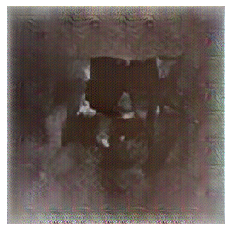

In [12]:
img_gen = blobs['deconv0']
with torch.no_grad():
    plt.imshow((img_gen.view([256,256,3]) - img_gen.data.min())/ (img_gen.data.max()-img_gen.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

## Try ActMax in CaffeNet

In [3]:
import os
from time import time
import re
import utils
from utils import add_neuron_subdir, add_trial_subdir
import utils
import numpy as np
from scipy import stats
import h5py
from cv2 import imread, imwrite
import matplotlib.pylab as plt

In [2]:
import net_utils

In [3]:
caffenet = net_utils.load('caffe-net')

In [7]:
tfmr = net_utils.get_transformer(caffenet)

In [4]:
img = np.floor(np.random.random((227,227,3))*256)

In [8]:
tim = tfmr.preprocess('data', img)  # shape=(3, 227, 227)
caffenet.blobs['data'].data[...] = tim
out = caffenet.forward(end='fc8') 

In [6]:
from importlib import reload

In [34]:
reload(caffemodel2pytorch)

<module 'caffemodel2pytorch' from 'D:\\Github\\Activation-Maximization-for-Visual-System\\caffemodel2pytorch.py'>

In [3]:
import caffemodel2pytorch

In [4]:
basedir = r"D:\Generator_DB_Windows\nets\caffenet"

In [5]:
f = h5py.File(os.path.join(basedir, 'bvlc_reference_caffenet.caffemodel'), 'r')

OSError: Unable to open file (file signature not found)

In [36]:
model = caffemodel2pytorch.Net(
	prototxt = os.path.join(basedir, "caffenet.prototxt"),
	# weights = os.path.join(basedir, 'bvlc_reference_caffenet.caffemodel'),
	caffe_proto = 'https://raw.githubusercontent.com/BVLC/caffe/master/src/caffe/proto/caffe.proto'
)

In [26]:
state_dict = torch.load(os.path.join(basedir, 'bvlc_reference_caffenet.caffemodel.pt'))
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Net:
	size mismatch for conv1.weight: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([96, 3, 11, 11]) in current model.
	size mismatch for conv1.bias: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1, 96]) in current model.
	size mismatch for conv2.weight: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([256, 48, 5, 5]) in current model.
	size mismatch for conv2.bias: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1, 256]) in current model.
	size mismatch for conv3.weight: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([384, 256, 3, 3]) in current model.
	size mismatch for conv3.bias: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1, 384]) in current model.
	size mismatch for conv4.weight: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([384, 192, 3, 3]) in current model.
	size mismatch for conv4.bias: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1, 384]) in current model.
	size mismatch for conv5.weight: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([256, 192, 3, 3]) in current model.
	size mismatch for conv5.bias: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1, 256]) in current model.
	size mismatch for fc6.weight: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 4096, 9216]) in current model.
	size mismatch for fc6.bias: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1, 4096]) in current model.
	size mismatch for fc7.weight: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 4096, 4096]) in current model.
	size mismatch for fc7.bias: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1, 4096]) in current model.
	size mismatch for fc8.weight: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1000, 4096]) in current model.
	size mismatch for fc8.bias: copying a param of torch.Size([0]) from checkpoint, where the shape is torch.Size([1, 1, 1, 1000]) in current model.

## Reload Weight from caffe

In [11]:
import torchvision.models as models
alexnet = models.alexnet(pretrained=False)

In [17]:
alexnet.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for AlexNet:
	size mismatch for features.0.weight: copying a param of torch.Size([64, 3, 11, 11]) from checkpoint, where the shape is torch.Size([96, 3, 11, 11]) in current model.
	size mismatch for features.0.bias: copying a param of torch.Size([64]) from checkpoint, where the shape is torch.Size([1, 1, 1, 96]) in current model.
	size mismatch for features.3.weight: copying a param of torch.Size([192, 64, 5, 5]) from checkpoint, where the shape is torch.Size([256, 48, 5, 5]) in current model.
	size mismatch for features.3.bias: copying a param of torch.Size([192]) from checkpoint, where the shape is torch.Size([1, 1, 1, 256]) in current model.
	size mismatch for features.6.weight: copying a param of torch.Size([384, 192, 3, 3]) from checkpoint, where the shape is torch.Size([384, 256, 3, 3]) in current model.
	size mismatch for features.6.bias: copying a param of torch.Size([384]) from checkpoint, where the shape is torch.Size([1, 1, 1, 384]) in current model.
	size mismatch for features.8.weight: copying a param of torch.Size([256, 384, 3, 3]) from checkpoint, where the shape is torch.Size([384, 192, 3, 3]) in current model.
	size mismatch for features.8.bias: copying a param of torch.Size([256]) from checkpoint, where the shape is torch.Size([1, 1, 1, 384]) in current model.
	size mismatch for features.10.weight: copying a param of torch.Size([256, 256, 3, 3]) from checkpoint, where the shape is torch.Size([256, 192, 3, 3]) in current model.
	size mismatch for features.10.bias: copying a param of torch.Size([256]) from checkpoint, where the shape is torch.Size([1, 1, 1, 256]) in current model.
	size mismatch for classifier.1.weight: copying a param of torch.Size([4096, 9216]) from checkpoint, where the shape is torch.Size([1, 1, 4096, 9216]) in current model.
	size mismatch for classifier.1.bias: copying a param of torch.Size([4096]) from checkpoint, where the shape is torch.Size([1, 1, 1, 4096]) in current model.
	size mismatch for classifier.4.weight: copying a param of torch.Size([4096, 4096]) from checkpoint, where the shape is torch.Size([1, 1, 4096, 4096]) in current model.
	size mismatch for classifier.4.bias: copying a param of torch.Size([4096]) from checkpoint, where the shape is torch.Size([1, 1, 1, 4096]) in current model.
	size mismatch for classifier.6.weight: copying a param of torch.Size([1000, 4096]) from checkpoint, where the shape is torch.Size([1, 1, 1000, 4096]) in current model.
	size mismatch for classifier.6.bias: copying a param of torch.Size([1000]) from checkpoint, where the shape is torch.Size([1, 1, 1, 1000]) in current model.

In [12]:
state_dict = torch.load(os.path.join(basedir, 'bvlc_reference_caffenet.caffemodel.pt'))

In [15]:
caffelayer_name_list = ["conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias", "conv4.weight", "conv4.bias", "conv5.weight", "conv5.bias", "fc6.weight", "fc6.bias", "fc7.weight", "fc7.bias", "fc8.weight", "fc8.bias"]
pytorchlayer_name_list = ["features.0.weight", "features.0.bias", "features.3.weight", "features.3.bias", "features.6.weight", "features.6.bias", "features.8.weight", "features.8.bias", "features.10.weight", "features.10.bias", "classifier.1.weight", "classifier.1.bias", "classifier.4.weight", "classifier.4.bias", "classifier.6.weight", "classifier.6.bias"]
for pt_name, cfname in zip(pytorchlayer_name_list, caffelayer_name_list):
    state_dict[pt_name] = state_dict.pop(cfname)

In [ ]:
from torch.nn.modules._functions import CrossMapLRN2d as _cross_map_lrn2d
class CrossMapLRN2d(Module):

    def __init__(self, size, alpha=1e-4, beta=0.75, k=1):
        super(CrossMapLRN2d, self).__init__()
        self.size = size
        self.alpha = alpha
        self.beta = beta
        self.k = k

    def forward(self, input):
        return _cross_map_lrn2d.apply(input, self.size, self.alpha, self.beta,
                                      self.k)

    def extra_repr(self):
        return '{size}, alpha={alpha}, beta={beta}, k={k}'.format(**self.__dict__)